# Predict MPG for vehicles in this dataset

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, mean_absolute_percentage_error

In [2]:
df = pd.read_csv('data/clean_auto_mpg.csv')

In [3]:
print(df.describe())

       Unnamed: 0         mpg   cylinders  displacement  horsepower  \
count  392.000000  392.000000  392.000000    392.000000  392.000000   
mean   197.579082   23.445918    5.471939    194.411990  104.469388   
std    114.534637    7.805007    1.705783    104.644004   38.491160   
min      0.000000    9.000000    3.000000     68.000000   46.000000   
25%     98.750000   17.000000    4.000000    105.000000   75.000000   
50%    197.500000   22.750000    4.000000    151.000000   93.500000   
75%    295.250000   29.000000    8.000000    275.750000  126.000000   
max    397.000000   46.600000    8.000000    455.000000  230.000000   

            weight  acceleration  model year      origin  
count   392.000000    392.000000  392.000000  392.000000  
mean   2977.584184     15.541327   75.979592    1.576531  
std     849.402560      2.758864    3.683737    0.805518  
min    1613.000000      8.000000   70.000000    1.000000  
25%    2225.250000     13.775000   73.000000    1.000000  
50%   

In [4]:
df.head()

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [7]:
list(df.columns)

['Unnamed: 0',
 'mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model year',
 'origin',
 'car name']

In [10]:
df.drop(labels=['Unnamed: 0', 'car name'],axis=1, inplace=True)

## Exploratory Data analysis

/Users/olabodealamu/PycharmProjects/practical_data_science_projects/venv/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mpg', ylabel='Density'>

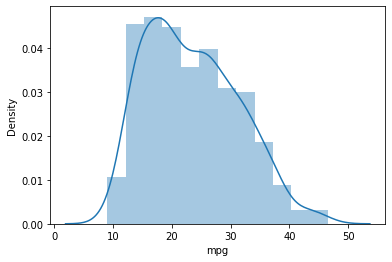

In [5]:
sns.distplot(df['mpg'])

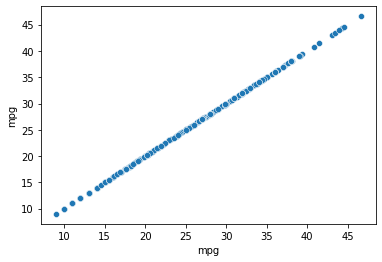

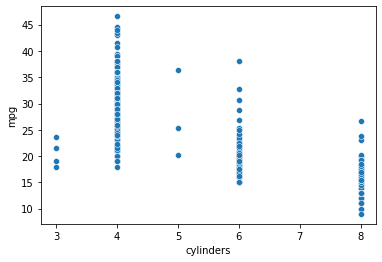

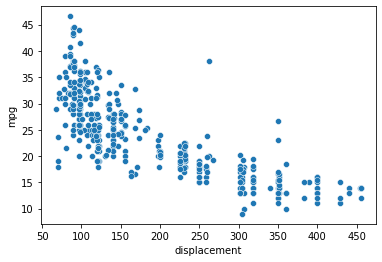

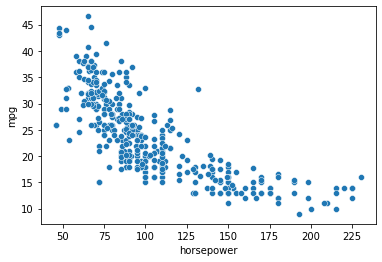

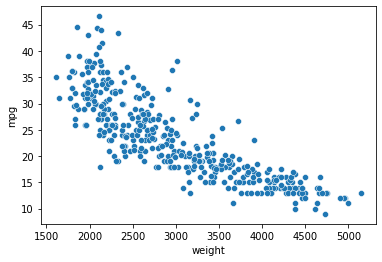

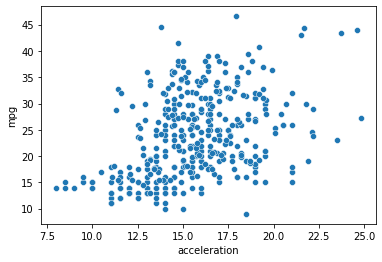

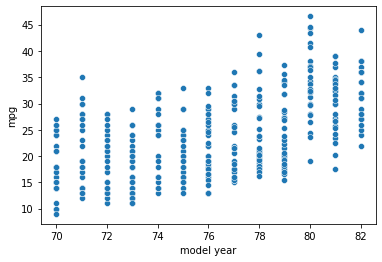

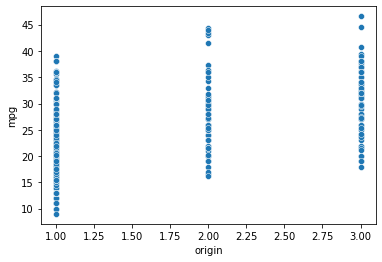

In [14]:
for col in df.columns:
    sns.scatterplot(x=col,y='mpg', data=df)
    plt.show()

In [16]:
df.corr('kendall')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.687444,-0.678586,-0.679166,-0.694243,0.303146,0.415247,0.468383
cylinders,-0.687444,1.000000,0.796611,0.686146,0.738015,-0.368486,-0.270179,-0.556915
displacement,-0.678586,0.796611,1.000000,0.718471,0.799706,-0.353873,-0.219933,-0.572568
horsepower,-0.679166,0.686146,0.718471,1.000000,0.703730,-0.488239,-0.277831,-0.406024
weight,-0.694243,0.738015,0.799706,0.703730,1.000000,-0.268563,-0.199813,-0.499051
acceleration,0.303146,-0.368486,-0.353873,-0.488239,-0.268563,1.000000,0.198396,0.178324
model year,0.415247,-0.270179,-0.219933,-0.277831,-0.199813,0.198396,1.000000,0.136037
origin,0.468383,-0.556915,-0.572568,-0.406024,-0.499051,0.178324,0.136037,1.000000


## Basic model

In [21]:
y= df['mpg']
df.drop('mpg', axis=1, inplace=True)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.33, random_state=42)

In [43]:
pipe = Pipeline(steps=[('scaler', StandardScaler(),),('lasso',LassoCV(),)])

In [44]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lasso', LassoCV())])

In [45]:
prediction = pipe.predict(X_test)

In [46]:
mae = mean_absolute_error(y_test, prediction)
r2 =r2_score(y_test, prediction)
mse =mean_squared_error(y_test, prediction)
mape =mean_absolute_percentage_error(y_test, prediction)

In [47]:
print(r2)

0.7974074228168655


In [48]:
print(mae)

2.544457327404233


In [49]:
print(mse)

10.698781656541213


In [50]:
print(mape)

0.12209247218248316


In [51]:
pipe.steps[1][1].coef_

array([-0.        ,  0.        , -0.88680463, -4.36635231,  0.07975811,
        2.52498638,  1.18449205])

In [52]:
X_train.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model year', 'origin'],
      dtype='object')

In [58]:
pd.DataFrame(pipe.steps[1][1].coef_, index=X_train.columns,columns=['Coefficient'])

,Coefficient
cylinders,-0.000000
displacement,0.000000
horsepower,-0.886805
weight,-4.366352
acceleration,0.079758
model year,2.524986
origin,1.184492


## Model 2

In [61]:
pipe2 = Pipeline(steps=[('scaler', StandardScaler(),),('lasso',LassoCV(),)])
X_train2 = X_train.drop(['displacement','horsepower',], axis=1)
X_test2 = X_test.drop(['displacement','horsepower',], axis=1)
pipe2.fit(X_train2, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lasso', LassoCV())])

In [62]:
prediction2 = pipe.predict(X_test2)
mae_2 = mean_absolute_error(y_test, prediction2)
r2_2 =r2_score(y_test, prediction2)
mse_2 =mean_squared_error(y_test, prediction2)
mape_2 =mean_absolute_percentage_error(y_test, prediction2)

In [63]:
r2_2

0.8025058185520224

In [64]:
mae_2

2.5003097803221066

In [65]:
mse_2

10.429538708317216

In [66]:
mape_2

0.1191386220442494

In [67]:
pipe2.steps[1][1].coef_

array([-0.        , -4.97924526,  0.43199536,  2.6400978 ,  1.15145218])

In [68]:
pd.DataFrame(pipe2.steps[1][1].coef_, index=X_train2.columns,columns=['Coefficient'])

,Coefficient
cylinders,-0.000000
weight,-4.979245
acceleration,0.431995
model year,2.640098
origin,1.151452
